In [54]:
import pandas as pd
from pprint import pprint as pp
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

# 1. Exploratory Data Analysis

## 1.1. Data Cleaning and Pre-Processing

In [2]:
crowdstorming_df = pd.read_csv('Data/CrowdstormingDataJuly1st.csv')
crowdstorming_df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [3]:
crowdstorming_df.shape

(146028, 28)

In [4]:
#crowdstorming_df.describe()
crowdstorming_df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID           True
rater1            True
rater2            True
refNum           False
refCountry       False
Alpha_3           True
meanIAT           True
nIAT              True
seIAT             True
meanExp           True
nExp              True
seExp             True
dtype: bool

From the description, we can conclude the following:
* There are missing values on rater1, rater2 and photoID and since our goal is to build a classifier based on those labels we decided to drop rows with nan values for those columns. 
* There are missing values in height, weight. A tentative solution is to replace those values by average heights and weights of people who belong to the same leagueCountry or people with same position (for e.g: goalkeeper is usually taller), but it is safe to do it and we don't have a lot of missing values. So, we decided to drop them.
* There are missing values for Alpha_3, meanIAT, nIAT, seIAT, meanExp, nExp, seExp. Those we also decided to drop.

In [5]:
crowdstorming_df = crowdstorming_df.dropna()

## 1.2. Aggregating player-referee information by player

In [6]:
f = {'club':'first',
     'leagueCountry':'first',
     'birthday':'first',
     'height':'first', 
     'weight':'first',
     'games': 'sum', 
     'victories':'sum',
     'ties': 'sum',
     'defeats': 'sum', 
     'goals': 'sum', 
     'yellowCards': 'sum', 
     'yellowReds': 'sum', 
     'redCards': 'sum',
     'photoID':'first',
     'position':'first',
     'refNum':'first',
     'refCountry':'first',
     'Alpha_3':'first',
     'meanIAT':'mean',
     'nIAT':'mean', 
     'seIAT':'mean',
     'meanExp': 'mean',
     'nExp':'mean', 
     'seExp':'mean',
     'rater1':'mean',
     'rater2':'mean'
    }
crowdstorming_df_player_agg = crowdstorming_df.groupby(['playerShort']).agg(f)

## 1.3. Encoding Categorical to Numerical Values

Since we want to use RandomForest Classifier, we need to convert all columns with categorical values into numerical values. Let's check for the categorical features:

In [7]:
crowdstorming_df_player_agg.dtypes

weight           float64
nExp             float64
height           float64
meanExp          float64
rater2           float64
yellowReds         int64
leagueCountry     object
rater1           float64
club              object
victories          int64
seExp            float64
Alpha_3           object
yellowCards        int64
photoID           object
nIAT             float64
birthday          object
goals              int64
ties               int64
defeats            int64
meanIAT          float64
refCountry         int64
refNum             int64
seIAT            float64
games              int64
position          object
redCards           int64
dtype: object

From the description above, the set of categorical features include:
* club
* leagueCountry
* birthday 
* position 
* Alpha_3

In [8]:
le = preprocessing.LabelEncoder()

crowdstorming_df_num = crowdstorming_df_player_agg 

# Converting club String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['club'])))
crowdstorming_df_num['club'] = le.transform(crowdstorming_df_player_agg['club']) 


# Converting leagueCountry String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['leagueCountry'])))
crowdstorming_df_num['leagueCountry'] = le.transform(crowdstorming_df_player_agg['leagueCountry']) 

# Converting birthday String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['birthday'])))
crowdstorming_df_num['birthday'] = le.transform(crowdstorming_df_player_agg['birthday']) 


# Converting position String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['position'])))
crowdstorming_df_num['position'] = le.transform(crowdstorming_df_player_agg['position']) 

# Converting position String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['Alpha_3'])))
crowdstorming_df_num['Alpha_3'] = le.transform(crowdstorming_df_player_agg['Alpha_3']) 

## 1.4. Binary & Multi-Class Classification Labels

### a. Inconsistent Labels:

In [27]:
pp(set(crowdstorming_df_num['rater1']))
pp(set(crowdstorming_df_num['rater2']))

set([0.0, 0.25, 0.5, 0.75, 1.0])
set([0.0, 0.25, 0.5, 0.75, 1.0])


So, there are 5 different rating values. In this supervised task, we have two target variables (rater1 and rater2). Instead of randomly picking one of the two, let us start by looking at the differences between rater1 and rater2 by calculating:
* The number of players for which rater1 and rater2 have at least 0.5 difference
* The number of players for which rater1 and rater2 have at least 0.25 difference
* The number of players for which rater1 and rater2 are similar

In [30]:
(abs(crowdstorming_df_num['rater1'] - crowdstorming_df_num['rater2'])).max()

0.5

In [53]:
count = 0
for i in range(0,len(crowdstorming_df_num)):
    if abs(crowdstorming_df_num.iloc[i]['rater1'] - crowdstorming_df_num.iloc[i]['rater2']) == 0:
        count+=1
pp("Number of ratings for which rater1 and rater2 agree: "+str(count))
pp("Percentage of ratings for which rater1 and rater2 agree over all ratings: "+ str(count/len(crowdstorming_df_num)))

'Number of ratings for which rater1 and rater2 agree: 1071'
'Percentage of ratings for which rater1 and rater2 agree over all ratings: 0.754756871036'


In [36]:
# Number of ratings for which difference between rater1 and rater2 is 0.25
count = 0
for i in range(0,len(crowdstorming_df_num)):
    if abs(crowdstorming_df_num.iloc[i]['rater1'] - crowdstorming_df_num.iloc[i]['rater2']) == 0.25:
        count+=1
print "Number of ratings for which difference between rater1 and rater2 is 0.25: "+str(count)

Number of ratings for which difference between rater1 and rater2 is 0.25: 346


In [37]:
# Number of ratings for which difference between rater1 and rater2 is 0.25
count = 0
for i in range(0,len(crowdstorming_df_num)):
    if abs(crowdstorming_df_num.iloc[i]['rater1'] - crowdstorming_df_num.iloc[i]['rater2']) == 0.5:
        count+=1
print "Number of ratings for which difference between rater1 and rater2 is 0.5: "+str(count)

Number of ratings for which difference between rater1 and rater2 is 0.5: 2


In [48]:
pp(crowdstorming_df_num['rater1'].value_counts())
pp(crowdstorming_df_num['rater2'].value_counts())

0.00    574
0.25    493
0.50    151
0.75    115
1.00     86
Name: rater1, dtype: int64
0.25    625
0.00    410
0.50    159
0.75    117
1.00    108
Name: rater2, dtype: int64


Based on this analysis, we can see inconsistent labelling for less than 25% of the cases. We have decided to drop players for which difference in rating between the two raters is more than 0.5 (since there are only 2). For the ones for which the difference is 0.25, we try with two different approaches:
* Taking the average: this can be problematic depending on the number of classes we want to use (if a player has 0.25 from rater1 and 0.5 from rater2, then taking the average will lead to rater1 dominating a binary classification)
* Keeping the two vectors for raters and training them separately to compare the results.

In [9]:
# Averaging over rater1 and rater2: 
crowdstorming_df_num['meanRating'] = (crowdstorming_df_num['rater1'] + crowdstorming_df_num['rater2'])/2
# Create Categories for Binary Classification
def binaryColor(x):
    if x < 0.5: 
        return 0
    else: 
        return 1
crowdstorming_df_num['BinaryColorClass'] = crowdstorming_df_num['meanRating'].apply(binaryColor) 

# Create Categories for Multi Classification
def multiColor(x):
    if x < 0.25: 
        return 0
    elif 0.25 <= x <0.5: 
        return 1
    elif 0.5 <= x < 0.75:
        return 2
    elif 0.75 <= x <= 1:
        return 3
crowdstorming_df_num['MultiColorClass'] = crowdstorming_df_num['meanRating'].apply(multiColor) 

In [67]:
features_player = ['weight', 'nExp', 'height', 'meanExp', 'yellowReds',
       'leagueCountry', 'club', 'victories', 'seExp', 'Alpha_3',
       'yellowCards', 'nIAT', 'birthday', 'goals', 'ties',
       'defeats','games','position', 'redCards']
features_referee = ['meanIAT', 'refCountry', 'refNum', 'seIAT']
X = crowdstorming_df_num [features_player]
y_binary = crowdstorming_df_num ['BinaryColorClass']
y_multi = crowdstorming_df_num ['MultiColorClass']

#### b. Unbalanced Classes:

Let us look at the skew in the number of classes: 

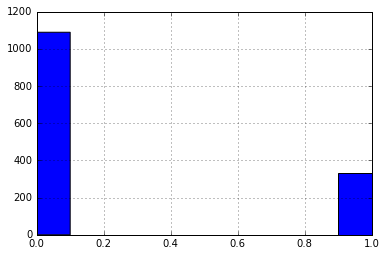

In [56]:
crowdstorming_df_num['BinaryColorClass'].hist()

In [60]:
crowdstorming_df_num['BinaryColorClass'].value_counts()

0    1089
1     330
Name: BinaryColorClass, dtype: int64

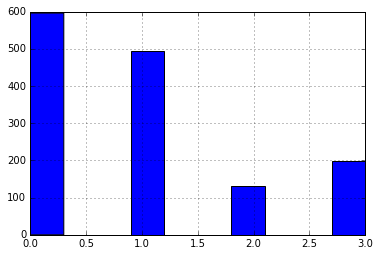

In [57]:
crowdstorming_df_num['MultiColorClass'].hist()

In [61]:
crowdstorming_df_num['MultiColorClass'].value_counts()

0    596
1    493
3    199
2    131
Name: MultiColorClass, dtype: int64

Based on this analysis, the classes we assigned turns out to be unbalanced . To mitigate this issue, there are two different strategies we can opt for: 
* Using different metrics, especially area under curve.
* Rebalancing the sample using weights passed to the model parameters.

In [66]:
def weight_sample(labels):
    
    weight_class = labels.value_counts()/len(labels)
    
    sample_weights = []
    for i in labels:
        sample_weights += [weight_class[i]]
        
    return np.array(sample_weights)

# 3. Supervised Learning using Random Forest

## 3.1. Binary Classification

### Splitting data into train and test

In [70]:
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X,y_binary, test_size=0.3)

In [74]:
sample_weights_binary = weight_sample(y_train_binary)

In [75]:
# Fit a random forest to the training data for binary classification, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced')

forest_binary = forest.fit(X_train, y_train_binary, sample_weight= sample_weights_binary)

Let's calculate the accuracy score for train binary classification 

In [76]:
from sklearn import metrics
result_binary_train = forest_binary.predict(X_train)
print(metrics.accuracy_score(y_train_binary, result_binary_train))

0.980866062437


In [77]:
from sklearn import metrics
result_binary_train = forest_binary.predict(X_train)
print(metrics.f1_score(y_train_binary, result_binary_train))

0.955082742317


Let's calculate the accuracy score for test binary classification

In [78]:
from sklearn import metrics
result_binary_test = forest_binary.predict(X_test)
print(metrics.accuracy_score(y_test_binary, result_binary_test))

0.765258215962


In [ ]:
from sklearn import metrics
result_binary_test = forest_binary.predict(X_test)
print(metrics.f1_score(y_test_binary, result_binary_test))

In [ ]:
from sklearn import metrics
result_binary_test = forest_binary.predict(X_test)
print(metrics.precision_score(y_test_binary, result_binary_test))

In [ ]:
from __future__ import division
def area_under_curve (y_train,y_pred):
    N = len(y_train) 
    pos_train = 0
    neg_train = 0
    for i in range(1,N):
        if y_train[i] == 0: 
            neg_train = neg_train + 1
    
    pos_train = N - neg_train
    pos_pred = 0
    neg_pred = 0
    for j in range(1,N):
        if y_pred[i]==1:
            neg_pred = neg_pred + 1
        else:
            pos_pred = pos_pred + 1
    balanced_error_rate = (1/2) * ((pos_train/(pos_train+pos_pred)) + (neg_train/(neg_train+neg_pred)))
    return 1-balanced_error_rate

In [ ]:
area_under_curve (y_test_binary, result_binary_test)

### K-Fold Cross Validation

In [ ]:
from sklearn.cross_validation import cross_val_score
forest_binary = forest.fit(X_train, y_train_binary) #, sample_weight= sample_weights)
scores_binary = cross_val_score(forest_binary,  X, y_binary, cv=10, scoring='accuracy')
scores_binary.mean()

## Choosing the parameters of the model

In [ ]:
results=[]
n_estimator_options=[10,30,50,100,200,500,1000,2000]

for trees in n_estimator_options:
    model = RandomForestClassifier(n_estimators=trees)
    scores_binary = cross_val_score(model,  X, y_binary, cv=10, scoring='accuracy')
    print(trees,'trees')
    print('score', scores_binary.mean())
    results.append(scores_binary.mean())
pd.Series(results, n_estimator_options).plot()

In [ ]:
results=[]
min_samples_leaf_options=[1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(min_samples_leaf=min_samples)
    scores_binary = cross_val_score(model,  X, y_binary, cv=10, scoring='accuracy')
    print(min_samples,'min_samples')
    print('score', scores_binary.mean())
    results.append(scores_binary.mean())
pd.Series(results, min_samples_leaf_options).plot()

In [ ]:
model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=6)
forest_binary = model.fit(X_train, y_train_binary) #, sample_weight= sample_weights)
scores_binary = cross_val_score(forest_binary,  X, y_binary, cv=10, scoring='accuracy')
scores_binary.mean()

In [ ]:
feature_importance= pd.Series(model.feature_importances_,index=X.columns)
feature_importance.sort()
feature_importance.plot(kind='barh')

## Bonus Part

In [62]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, learning_curve
import numpy as np

In [63]:
def plot_learning_curve(estimator,X,Y,cv=20):
    plt.figure()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, cv=cv, train_sizes=np.linspace(0.2,1,20),scoring="f1")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
            label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

In [64]:
estimator = RandomForestClassifier()    

plot_learning_curve(estimator,X,y_binary)   


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
estimator = RandomForestClassifier(n_estimators = 6, max_features = 10)    
plot_learning_curve(estimator,X,y_binary)   

In [ ]:
estimator = RandomForestClassifier(max_depth = )    
plot_learning_curve(estimator,X,y_binary)   

In [ ]:
estimator = RandomForestClassifier(n_estimators=50)    
plot_learning_curve(estimator,X,y_binary)  

In [ ]:
estimator = RandomForestClassifier(n_estimators=2)    
plot_learning_curve(estimator,X,y_binary)   

# 3.2. Multi-Class Classification

### Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_multi, y_test_multi = train_test_split(X,y_multi, test_size=0.3)

In [ ]:
# Fit a random forest to the training data for multi-class classification, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 10 )

forest_multi = forest.fit(X_train, y_train_multi)

### Calculating the accuracy of the model

In [ ]:
from sklearn import metrics
result_multi_train = forest_multi.predict(X_train)
print(metrics.accuracy_score(y_train_multi, result_multi_train))

In [ ]:
from sklearn import metrics
result_multi_test = forest_multi.predict(X_test)
print(metrics.accuracy_score(y_test_multi, result_multi_test))

In [ ]:
area_under_curve (y_test_multi, result_multi_test)

# 4. Unsupervised Learning

In [ ]:
import pandas as pd
import numpy as np
 
crowdstorming_df['skin'] = crowdstorming_df[['rater1', 'rater2']].mean(axis=1)
crowdstorming_df = crowdstorming_df.drop(['rater1', 'rater2'], axis=1)

In [ ]:
#df.fillna(df.mean()).dropna(axis=1, how='all')
for _col_name_ in ['height', 'weight','meanIAT','nIAT','seIAT']:
    crowdstorming_df[_col_name_] = crowdstorming_df[_col_name_].fillna(crowdstorming_df[_col_name_].mean())

In [ ]:
f = {
    #'club':'first',
    #'birthday':'first',
    'height':'first', 
    'weight':'first',
    'games': 'sum', 
    'victories':'sum',
    'ties': 'sum',
    'defeats': 'sum', 
    'goals': 'sum', 
    'yellowCards': 'sum', 
    'yellowReds': 'sum', 
    'redCards': 'sum',
    #'position':'first',
    #'refNum':'first',
    #'refCountry':'first',
    'meanIAT':'mean',
    'nIAT':'mean', 
    'seIAT':'mean',
    'meanExp': 'mean',
    'nExp':'mean', 
    'seExp':'mean',
    #'rater1':'mean',
    #'rater2':'mean'
    #'skin':'mean',
    'leagueCountry':'first'
}

#df_aggr = df.groupby(['playerShort']).agg(f)
df_grouped = crowdstorming_df.groupby(['playerShort'])

df_skin = df_grouped.agg({'skin': 'mean'})
df_skin['actual_skin'] = np.where(df_skin['skin'] > 0.5, 1,0)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


scale = StandardScaler()

def sil_score(df_aggr):
    df_aggr_scaled = scale.fit_transform(df_aggr.as_matrix())
    kmeans_model = KMeans(n_clusters=2, random_state=0).fit(df_aggr_scaled)
    labels = kmeans_model.labels_
    return labels, silhouette_score(df_aggr_scaled, labels)

In [ ]:
for i in reversed(range(1,len(f.items()))):
    combination = dict(list(f.items())[:i])
    _df_aggregated = df_grouped.agg(dict(combination))
    _df_aggregated = pd.get_dummies(_df_aggregated)
    
    labeled, score = sil_score(_df_aggregated)
    cluster_0 = df_skin[labeled == 0]
    cluster_1 = df_skin[labeled == 1]
    
    print("FIRST CLUSTER: ", cluster_0['skin'].mean(),len(cluster_0))
    print("SCND  CLUSTER: ", cluster_1['skin'].mean(),len(cluster_1))
    
    cluster_0_whites = len(cluster_0[cluster_0['skin'] > 0.5])
    cluster_0_blacks = len(cluster_0[cluster_0['skin'] <= 0.5])
    
    cluster_1_whites = len(cluster_1[cluster_1['skin'] > 0.5])
    cluster_1_blacks = len(cluster_1[cluster_1['skin'] <= 0.5])
    
    print("CLUSTER 0: %d/%d = %%%d" % (cluster_0_whites, len(cluster_0), int(cluster_0_whites/len(cluster_0)*100)))
    print("CLUSTER 1: %d/%d = %%%d" % (cluster_1_whites, len(cluster_1), int(cluster_1_whites/len(cluster_1)*100)))

    
    print(score,_df_aggregated.columns)
    print(score)

In [ ]:
df_skin